# Paper: Data-based analysis, modelling and forecasting of the COVID-19 outbreak

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

2 age groups
SVEIDR

C:\Users\kuotuantuan\AppData\Local\Temp\ipykernel_16592\704065919.py:65: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


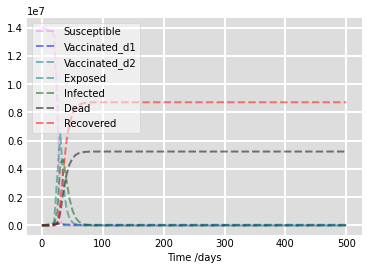

In [19]:
# The SVIDR model differential equations.
def deriv(y, t, age_num, alpha1, alpha2, beta, gamma, sigma1, sigma2, lbda, rho, M):
    S, V1, V2, E, I, D, R = y[0:2], y[2:4], y[4:6], y[6:8], y[8:10], y[10:12], y[12:14]
    dSdt, dV1dt, dV2dt, dEdt, dIdt, dDdt, dRdt = [], [], [], [], [], [], []

    for i in range(age_num): # age for i
        dSdt.append( - beta/N * S[i] * M[i, :].dot(I) - (alpha1+alpha2) * S[i] )
        dV1dt.append( alpha1 * S[i] - sigma1 * beta/N * V1[i] * M[i, :].dot(I) )  # dose 1
        dV2dt.append( alpha2 * S[i] - sigma2 * beta/N * V2[i] * M[i, :].dot(I) )  # dose 2
        dEdt.append( beta/N * S[i] * M[i, :].dot(I) + (sigma1*beta/N*V1[i] + sigma2*beta/N*V2[i])* M[i, :].dot(I) - gamma * E[i] )
        dIdt.append( gamma * E[i] - lbda * I[i] - rho * I[i] )
        dDdt.append( lbda * I[i] )
        dRdt.append( rho * I[i] )

    return dSdt + dV1dt + dV2dt + dEdt + dIdt + dDdt + dRdt

age_num = 2

# Initial conditions
N = 3.5e7

init0 = np.array([[N*0.4, N*0.6], #S
          [0, 0], #V1
          [0, 0], #V2
          [0, 0], #E
          [1, 1],
          [0, 0],
          [0, 0]])


# A grid of time points (in days)
t = np.linspace(0, 500, 100) 

#parameters
M = np.array([[20.7, 6.3],
              [6.3, 10.4]])
alpha1 = 3.5e-4
alpha2 = 5e-4
beta = 0.3
gamma = 0.18
sigma1 = 0.05
sigma2 = 0.15
lbda = 0.06
rho = 0.1

# Initial conditions vector
y0 = init0.reshape(14, )
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(age_num, alpha1, alpha2, beta, gamma, sigma1, sigma2, lbda, rho, M))
S1, S2, V11, V21, V12, V22, E1, E2, I1, I2, D1, D2, R1, R2 = ret.T # V12 = age1, dose2

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S1, 'violet', alpha=0.5, lw=2, label='Susceptible', linestyle='dashed')
ax.plot(t, V11, 'blue', alpha=0.5, lw=2, label='Vaccinated_d1', linestyle='dashed')
ax.plot(t, V12, 'teal', alpha=0.5, lw=2, label='Vaccinated_d2', linestyle='dashed')
ax.plot(t, E1, 'teal', alpha=0.5, lw=2, label='Exposed', linestyle='dashed')
ax.plot(t, I1, 'darkgreen', alpha=0.5, lw=2, label='Infected', linestyle='dashed')
ax.plot(t, D1, 'black', alpha=0.5, lw=2, label='Dead', linestyle='dashed')
ax.plot(t, R1, 'red', alpha=0.5, lw=2, label='Recovered', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

C:\Users\kuotuantuan\AppData\Local\Temp\ipykernel_16592\133478914.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


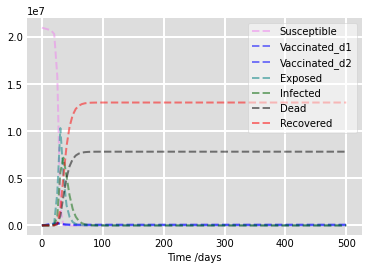

In [20]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S2, 'violet', alpha=0.5, lw=2, label='Susceptible', linestyle='dashed')
ax.plot(t, V21, 'blue', alpha=0.5, lw=2, label='Vaccinated_d1', linestyle='dashed')
ax.plot(t, V22, 'blue', alpha=0.5, lw=2, label='Vaccinated_d2', linestyle='dashed')
ax.plot(t, E2, 'teal', alpha=0.5, lw=2, label='Exposed', linestyle='dashed')
ax.plot(t, I2, 'darkgreen', alpha=0.5, lw=2, label='Infected', linestyle='dashed')
ax.plot(t, D2, 'black', alpha=0.5, lw=2, label='Dead', linestyle='dashed')
ax.plot(t, R2, 'red', alpha=0.5, lw=2, label='Recovered', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [21]:
#save to csv file
a = np.asarray([t, S1, V11, V12, E1, I1, D1, R1, S2, V21, V22, E2, I2, D2, R2]) 

np.savetxt("sveidr_vacc2_sim2.csv", a, delimiter=",")